### 2022 Fall Phy 765 Advanced Quantum Mechanics Project #2 Problem 2
### Members: Michael Straus, Eren Guttentag, Jiyong Yu

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from worm_simulation import Worm_algorithm

In [7]:
################################################### Block function #####################################################
def block(array, N):
    # Device the given array into blocks with block size N
    
    l = int(len(array) / N)
    
    blocked_array = np.zeros([l, N])
    
    for i in range(l):
        block_start = i * N
        block_end = block_start + N
        
        blocked_array[i] = array[block_start: block_end]
        
    return blocked_array

def get_error(blocked_array):
    l = len(blocked_array)
    average_each_block = []
    
    for i in range(l):
        average_each_block.append(np.average(blocked_array[i]))

    return np.std(average_each_block) / np.sqrt(l)

################################################### Simulation #####################################################

### Parameter Setting ###
[N, mu, epsilon, dimension] = [20, 1.0, 0.01, 3]

N_beta = 15
beta_min = 0.75
beta_max = 1.1
beta_array = np.linspace(beta_min, beta_max, N_beta)

susceptibility_array = []
susceptibility_error_array = []

num_trials = 5000 # Monte-Carlo try number
block_size = 50

### Get the square of the winding number varying the beta ###
for beta in beta_array:
    parameters = [N, mu, epsilon, beta, dimension]
    worm_algorithm = Worm_algorithm(parameters) # Initialization
    num_winding_square_Monte_Carlo = [] # Saves the winding number result of each Monte-Carlo try
    
    # Monte-Carlo simulation part
    for counter in range(num_trials):
        num_particles, e_tilda, weight, num_winding = worm_algorithm.measure_observables()
        num_winding_square_Monte_Carlo.append(num_winding ** 2)

        old_grid = worm_algorithm.get_pathed_grid()
        new_grid = worm_algorithm.update_grid(old_grid)
        worm_algorithm.set_pathed_grid(new_grid)
        
        #print('-----------------' + str(counter) + ' New grid created----------------------')
        #if (((counter + 1) % 500) == 0): print('-----------------' + str(counter + 1) + ' New grid created----------------------')
    
    susceptibility_array.append(np.average(num_winding_square_Monte_Carlo) / (N * beta))
    susceptibility_error_array.append(get_error(block(num_winding_square_Monte_Carlo, block_size)) / (N * beta))
    
    print('-----------------------beta = %.3f done-----------------------------' % beta)



-----------------------beta = 0.750 done-----------------------------
-----------------------beta = 0.775 done-----------------------------
-----------------------beta = 0.800 done-----------------------------
-----------------------beta = 0.825 done-----------------------------
-----------------------beta = 0.850 done-----------------------------
-----------------------beta = 0.875 done-----------------------------
-----------------------beta = 0.900 done-----------------------------
-----------------------beta = 0.925 done-----------------------------
-----------------------beta = 0.950 done-----------------------------
-----------------------beta = 0.975 done-----------------------------
-----------------------beta = 1.000 done-----------------------------
-----------------------beta = 1.025 done-----------------------------
-----------------------beta = 1.050 done-----------------------------
-----------------------beta = 1.075 done-----------------------------
--------------------

<ErrorbarContainer object of 3 artists>

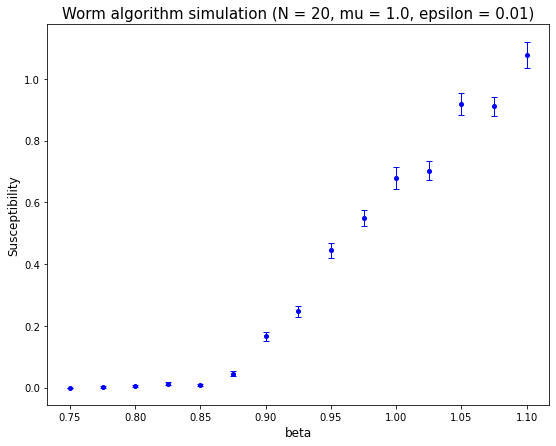

In [10]:
plt.rcParams['figure.facecolor'] = 'white'
#plt.plot(mu_array, n_array)

plt.figure(figsize = (9, 7))
plt.xlabel('beta', fontsize = 12)
plt.ylabel('Susceptibility', fontsize = 12)
plt.title('Worm algorithm simulation (N = 20, mu = 1.0, epsilon = 0.01)', fontsize = 15)
plt.errorbar(beta_array, susceptibility_array, yerr = susceptibility_error_array, marker = 'o', markersize = 4, color = 'blue', linestyle = 'none', linewidth = 1, capsize = 3)
